In [1]:
import os
import sys
# 現在のノートブック位置: notebooks/demo
# プロジェクトルートは notebooks/demo/ から 2階層上: "../.."
PROJECT_ROOT = os.path.abspath(os.path.join("..", ".."))

# Python のモジュール検索パスに追加
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("sys.path:", sys.path)

PROJECT_ROOT: /Users/norikikomori/Desktop/img_rec
sys.path: ['/Users/norikikomori/Desktop/img_rec/notebooks/demo', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/opt/anaconda3/lib/python3.12/site-packages/setuptools/_vendor', '/Users/norikikomori/Desktop/img_rec']


In [2]:
# from src.config import RAW_DATA_DIR
import numpy as np
import matplotlib.pyplot as plt
from src.dataset.process import load_npz_file, load_npz_signal, target_image, collected_signal
from src.dataset.speckle_pred import speckle_pred_inv
from src.utils.inv_recon import img_reconstruction
from src.utils.utils import standardize, min_max_normalize_np
file_y = "Rand+Mnist+Rand_pix28x28_image(1500+10+1500)x2_sig2500x4wave.npz"
file_x = "Rand+Mnist+Rand_size28x28_image(1500+10+1500)x2.npz"

In [3]:
Y_random, Y_mnist = collected_signal(path=file_y, select="black")
X_random, X_mnist = target_image(path=file_x, select="black")
S = speckle_pred_inv(path_x=file_x, path_y=file_y, select="black")

In [4]:
print(S.shape)

(784, 10000)


In [5]:
S.min()

-0.0031101531927930455

In [6]:
X_mnist_first = img_reconstruction(S * 2, Y_mnist)

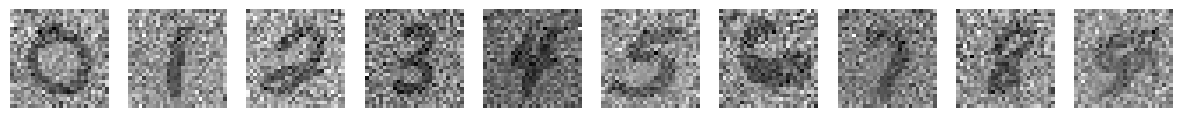

In [7]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # 1行10列でサブプロットを作成
for i in range(10):
    img = X_mnist_first[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')  # 軸を非表示にする
plt.show()

In [8]:
X_mnist_first

array([[ 1.07310353,  0.45189848,  0.34433466, ...,  0.50540031,
         0.70547851,  0.56403447],
       [ 0.72914844,  1.0686219 ,  0.13488598, ...,  1.15750817,
         0.82408258,  0.71316249],
       [ 0.04189098,  0.77292162,  0.87153826, ...,  1.21578263,
         0.63013916,  0.66757273],
       ...,
       [ 0.80577035,  1.05904846, -0.41270106, ...,  1.33284201,
         1.12709362,  0.23203305],
       [-0.054591  ,  0.96278083,  0.97856949, ...,  0.78436152,
         0.19349613,  0.99431071],
       [ 0.48903952,  0.59173467,  0.26209893, ...,  0.74573706,
         0.51747118,  0.56746076]])

In [9]:
X_mnist_first_std = standardize(X_mnist_first)

mean (before): 0.6346986075643315
std (before): 0.3861034533370072
mean (after): -4.350261647510817e-17
std (after): 0.9999997410021245


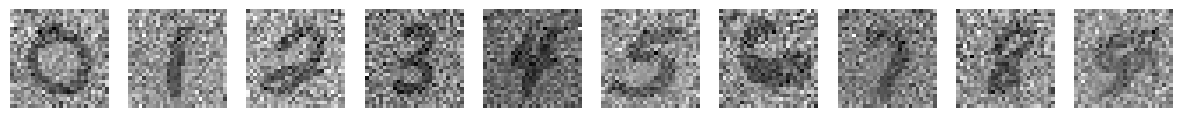

In [10]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # 1行10列でサブプロットを作成
for i in range(10):
    img = X_mnist_first_std[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')  # 軸を非表示にする
plt.show()

In [11]:
X_mnist_first_std.min()

-4.023860872349452

In [12]:
X_mnist_first_mx = min_max_normalize_np(X_mnist_first)

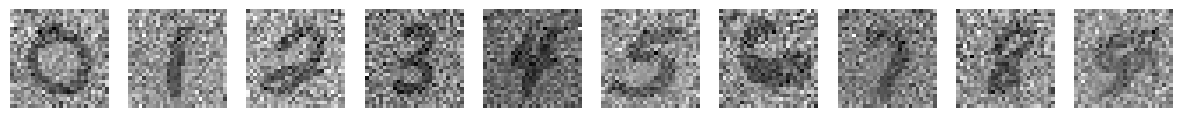

In [13]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # 1行10列でサブプロットを作成
for i in range(10):
    img = X_mnist_first_mx[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')  # 軸を非表示にする
plt.show()

In [14]:
X_mnist_first_mx

array([[0.58431283, 0.40209784, 0.37054668, ..., 0.41779126, 0.47647921,
        0.43499013],
       [0.48342219, 0.58299826, 0.30911014, ..., 0.60907083, 0.51126875,
        0.47873311],
       [0.28183237, 0.49626196, 0.52518869, ..., 0.62616418, 0.45438029,
        0.46536049],
       ...,
       [0.50589732, 0.58019013, 0.14848915, ..., 0.66050063, 0.60014948,
        0.3376058 ],
       [0.25353179, 0.55195242, 0.55658363, ..., 0.49961757, 0.32630196,
        0.56120093],
       [0.41299224, 0.44311529, 0.34642488, ..., 0.48828805, 0.42133195,
        0.43599515]])